In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('data/exams.csv')

In [54]:
df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,ethnicity
0,female,some college,standard,completed,59,70,78,group D
1,male,associate's degree,standard,none,96,93,87,group D
2,female,some college,reduced,none,57,76,77,group D
3,male,some college,reduced,none,70,70,63,group B
4,female,associate's degree,standard,none,83,85,86,group D
...,...,...,...,...,...,...,...,...
509,male,associate's degree,standard,none,78,73,65,group E
510,male,some high school,reduced,completed,46,53,54,group D
511,male,associate's degree,reduced,none,72,80,75,group C
512,female,associate's degree,reduced,none,45,61,57,group D


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
for col in df.columns:
    print(df[col].value_counts())

gender
male      508
female    492
Name: count, dtype: int64
race/ethnicity
group C    323
group D    257
group B    198
group E    143
group A     79
Name: count, dtype: int64
parental level of education
some college          224
high school           215
associate's degree    204
some high school      177
bachelor's degree     105
master's degree        75
Name: count, dtype: int64
lunch
standard        660
free/reduced    340
Name: count, dtype: int64
test preparation course
none         656
completed    344
Name: count, dtype: int64
math score
62    32
74    30
59    29
67    29
68    28
      ..
21     1
25     1
15     1
24     1
27     1
Name: count, Length: 79, dtype: int64
reading score
72    36
77    35
66    34
68    32
69    30
      ..
34     1
30     1
32     1
41     1
37     1
Name: count, Length: 71, dtype: int64
writing score
78    32
72    32
74    31
70    31
63    29
      ..
28     1
15     1
27     1
30     1
23     1
Name: count, Length: 74, dtype: int64


In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
# No missing valuess 
df.shape

(1000, 8)

In [8]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of      gender race/ethnicity parental level of education         lunch  \
0    female        group D                some college      standard   
1      male        group D          associate's degree      standard   
2    female        group D                some college  free/reduced   
3      male        group B                some college  free/reduced   
4    female        group D          associate's degree      standard   
..      ...            ...                         ...           ...   
995    male        group C                some college      standard   
996    male        group C                some college      standard   
997  female        group A                 high school      standard   
998    male        group E                 high school      standard   
999    male        group D                 high school      standard   

    test preparation course  math score  reading score  writing score  
0                 co

In [9]:
df.shape

(1000, 8)

# EDA 



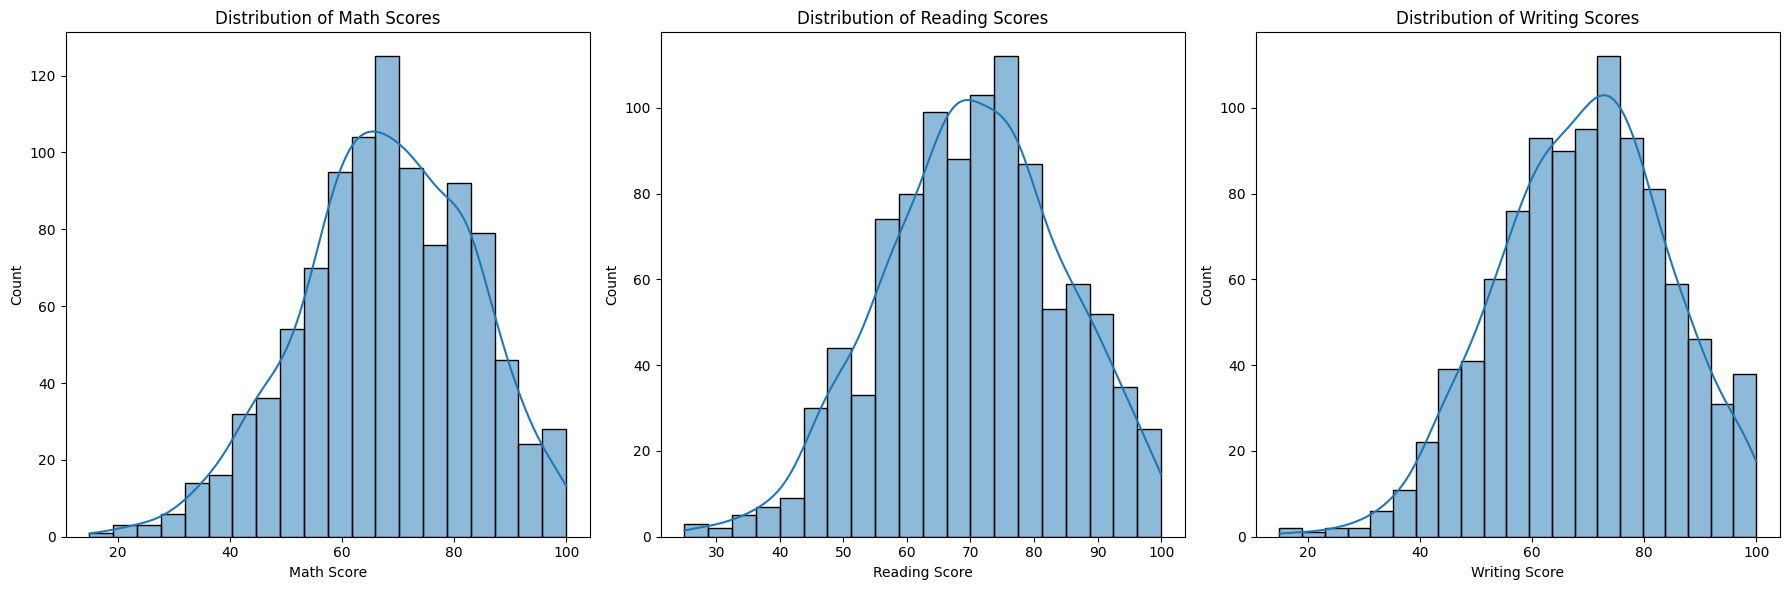

Correlation matrix:
               math score  reading score  writing score
math score       1.000000       0.811767       0.790055
reading score    0.811767       1.000000       0.948909
writing score    0.790055       0.948909       1.000000


In [10]:

# plt.style.use('seaborn')
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot histograms for each score
sns.histplot(data= df, x=df['math score'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Math Scores')
axes[0].set_xlabel('Math Score')

sns.histplot(data = df, x=df['reading score'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Reading Scores')
axes[1].set_xlabel('Reading Score')

sns.histplot(data=df,x=df['writing score'], kde=True, ax=axes[2])
axes[2].set_title('Distribution of Writing Scores')
axes[2].set_xlabel('Writing Score')

plt.tight_layout()
plt.show()

# Calculate correlations between scores
correlation_matrix = df[['math score', 'reading score', 'writing score']].corr()
print('Correlation matrix:')
print(correlation_matrix)



c:\Users\BS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\BS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\BS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\BS\AppData\Local\Programs\Python\Python312\Lib\site-pa

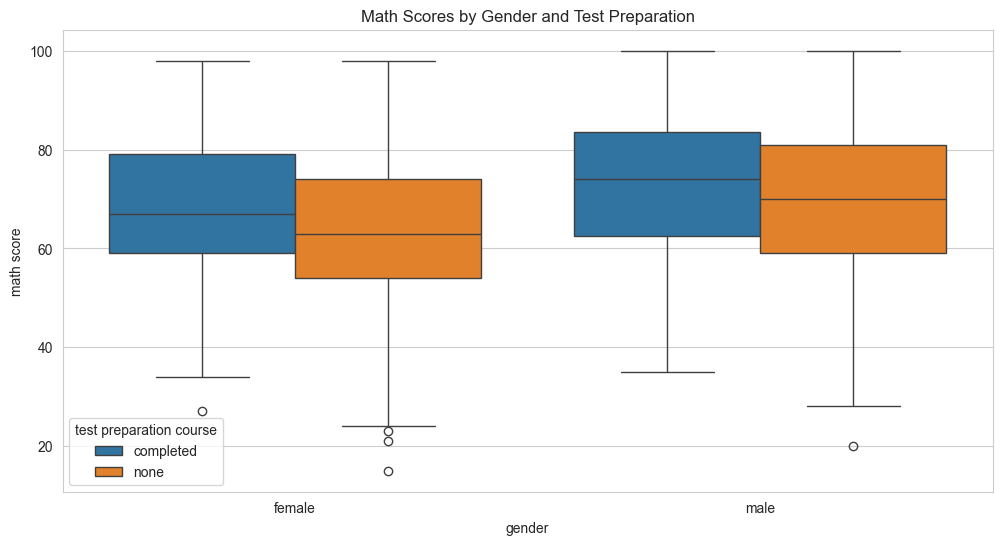

Average scores by gender and test preparation course:
                                math score  reading score  writing score
gender test preparation course                                          
female completed                     67.56          77.73          79.86
       none                          63.21          71.08          69.83
male   completed                     73.27          71.54          71.51
       none                          69.52          65.35          61.78
done


In [11]:


plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')

sns.boxplot(x='gender', y='math score', hue='test preparation course', data=df)
plt.title('Math Scores by Gender and Test Preparation')
plt.show()

avg_scores = df.groupby(['gender', 'test preparation course'])[['math score', 'reading score', 'writing score']].mean().round(2)
print('Average scores by gender and test preparation course:')
print(avg_scores)

print('done')

Average scores by parental education level:
                             math score  reading score  writing score
parental level of education                                          
master's degree                   71.03          71.97          71.75
associate's degree                70.35          72.65          72.04
bachelor's degree                 69.87          71.82          72.27
some college                      68.64          70.94          69.47
high school                       65.38          69.22          66.77
some high school                  64.20          66.94          65.29


c:\Users\BS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\BS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\BS\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(

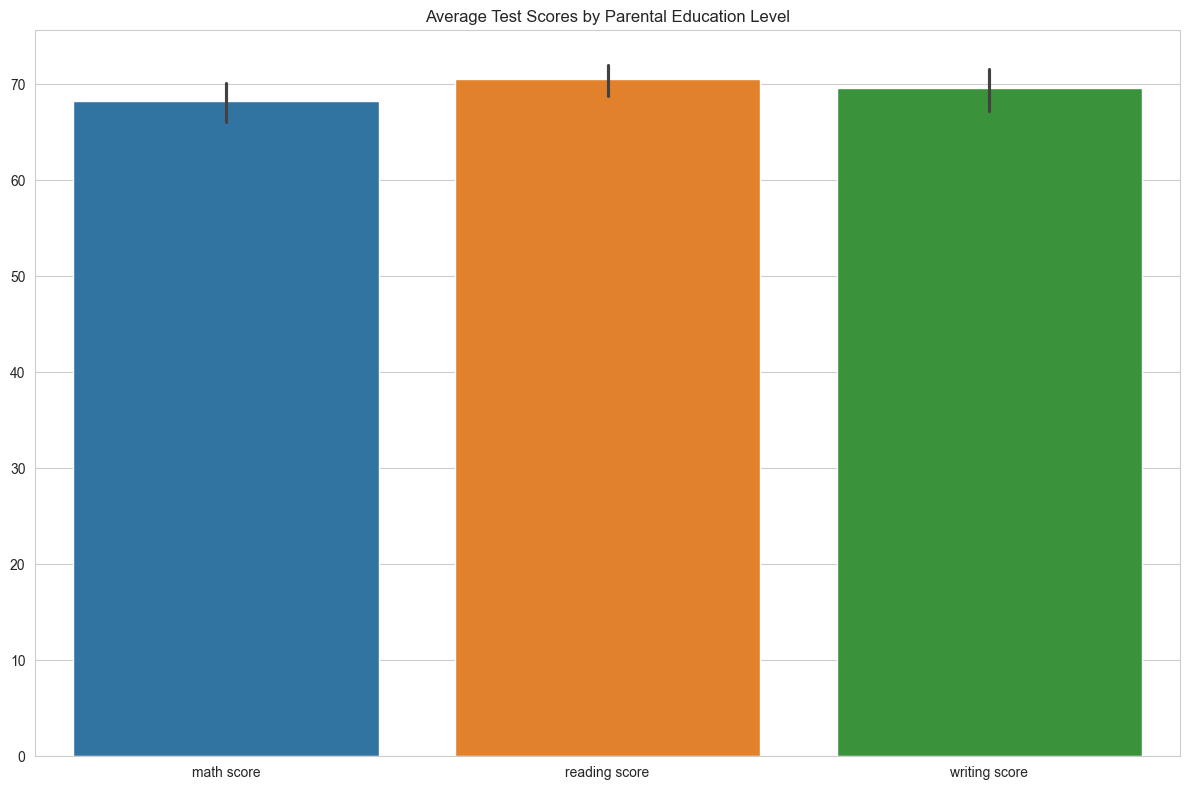

In [12]:
avg_scores_by_education = df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().round(2)


avg_scores_by_education = avg_scores_by_education.sort_values('math score', ascending=False)

print('Average scores by parental education level:')
print(avg_scores_by_education)

plt.figure(figsize=(12, 8))
sns.barplot( avg_scores_by_education,)
plt.title('Average Test Scores by Parental Education Level')
plt.tight_layout()
plt.show()

In [13]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [14]:
df['ethnicity']= df['race/ethnicity']

In [15]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,ethnicity
0,female,group D,some college,standard,completed,59,70,78,group D
1,male,group D,associate's degree,standard,none,96,93,87,group D
2,female,group D,some college,free/reduced,none,57,76,77,group D
3,male,group B,some college,free/reduced,none,70,70,63,group B
4,female,group D,associate's degree,standard,none,83,85,86,group D


In [16]:
df=df.drop('race/ethnicity', axis=1)

In [17]:
df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,ethnicity
0,female,some college,standard,completed,59,70,78,group D
1,male,associate's degree,standard,none,96,93,87,group D
2,female,some college,free/reduced,none,57,76,77,group D
3,male,some college,free/reduced,none,70,70,63,group B
4,female,associate's degree,standard,none,83,85,86,group D


In [18]:
df['lunch'] = df['lunch'].str.replace('^free/', '', regex=True)


In [55]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error, mean_squared_error,r2_score
import numpy as np
from sklearn.linear_model import LinearRegression



In [56]:

categorical_features = ['gender', 'parental level of education', 'lunch', 'test preparation course', 'ethnicity']
numerical_features = ['reading score', 'writing score']

In [57]:
X = df.drop('math score', axis=1)
y = df['math score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ]
)


In [59]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearRegression())
])


In [60]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['reading score',
                                                   'writing score']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender',
                                                   'parental level of '
                                                   'education',
                                                   'lunch',
                                                   'test preparation course',
                                                   'ethnicity'])])),
                ('classifier', LinearRegression())])

In [61]:
y_pred = model.predict(X_test)


In [62]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2_score = r2_score(y_test,y_pred)
MAPE= mean_absolute_percentage_error(y_test,y_pred)* 100 
print (f'mean_squared_error  {mse}')
print (f'mean_absolute_error  {mae}')
print (f'r2_score  {r2_score}')

mean_squared_error  24.83855821054256
mean_absolute_error  4.073537121893527
r2_score  0.8874881345612097


## finding the 

In [69]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE(Mean_Absolute_percentage_error): {mape:.2%}')

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_percentage_error')
cv_mape = -np.mean(cv_scores)
print(f'Cross-validated MAPE(Mean_Absolute_percentage_error: {cv_mape:.2%}')

MAPE: 6.40%
Cross-validated MAPE: 7.16%


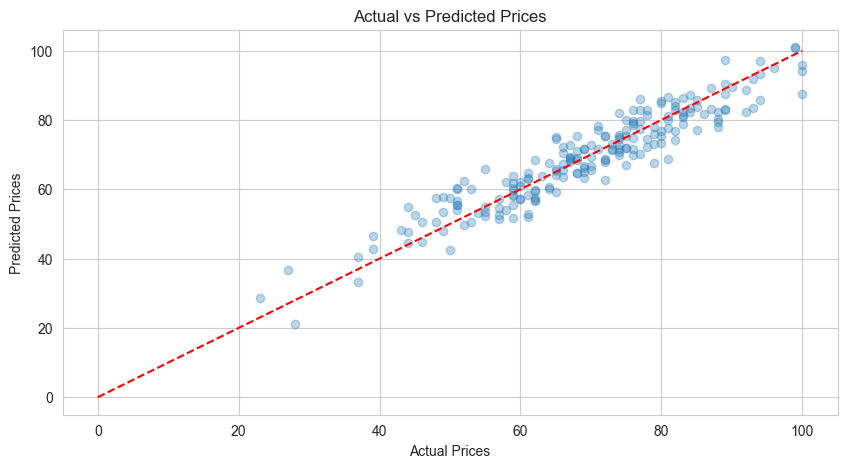

In [64]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs actual prices
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


In [30]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))